In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import os
df = pd.read_csv('../Dataset/slider_features.csv').drop('file_name',axis=1)


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 

scaler = StandardScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns = df.columns[:-1])
df_1['class'] = df['class']
df_1

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,0.330403,-0.111409,-0.612230,-0.547201,-0.780598,-0.634709,-1.047566,-0.005438,-0.186318,0.477745,0.136254,-0.550328,-0.253502,-0.086932,-0.791563,-0.798138,-0.443195,-0.309697,0
1,0.705956,-0.150267,-2.034142,-0.515184,-0.993941,-0.711149,-0.811749,-1.166987,-1.233736,-1.431716,-1.290532,-0.492211,-0.934917,-0.942717,-0.574466,-0.391122,-0.424643,-0.534390,0
2,0.489557,-0.290336,0.455827,-0.073744,-0.878037,-0.672929,-1.098553,-0.380285,-0.961878,-0.088021,-0.901947,-0.014322,-0.809844,-0.688188,-0.144908,0.006556,-0.074864,-0.345452,0
3,0.869332,-0.957783,-0.013581,-0.290334,-0.494573,-0.672929,-0.932844,0.588445,-0.126237,0.813669,0.221742,-0.259287,-0.324310,0.353320,-0.423958,0.228802,-0.236818,-0.304734,0
4,0.797117,-0.853169,-0.170294,-0.109574,-1.052019,-0.825809,-1.187781,-0.927016,-1.361076,-0.759868,-1.437317,-0.059727,-0.991090,-0.455432,-0.221353,0.517874,-0.107544,-0.335033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,-1.646317,1.963358,-0.831703,-0.055760,-0.403302,-0.176070,0.807103,-0.355850,-0.429871,-0.600747,-0.442208,-0.185129,-0.382877,-0.821247,-0.019637,-0.362810,-0.093600,0.235024,1
4090,-2.158681,2.316368,-0.670230,-0.293480,0.368368,0.702990,0.698755,0.200895,0.209927,-0.441625,0.100268,-0.503777,0.229469,0.738127,-0.216879,-0.756139,-0.325548,0.115031,1
4091,-1.601332,2.131823,-0.830824,-0.552866,0.400806,0.932310,0.756116,0.437705,0.257964,-0.476985,0.220442,-0.756858,0.202141,-0.336263,-0.532846,-1.588571,-0.505483,-0.000577,1
4092,-0.778805,0.995287,-0.634274,-0.897181,2.709773,0.244350,1.023800,0.140987,2.065875,-0.070341,1.730146,-1.247587,4.062741,1.807543,-0.711404,-3.822867,-0.892747,-0.209592,1


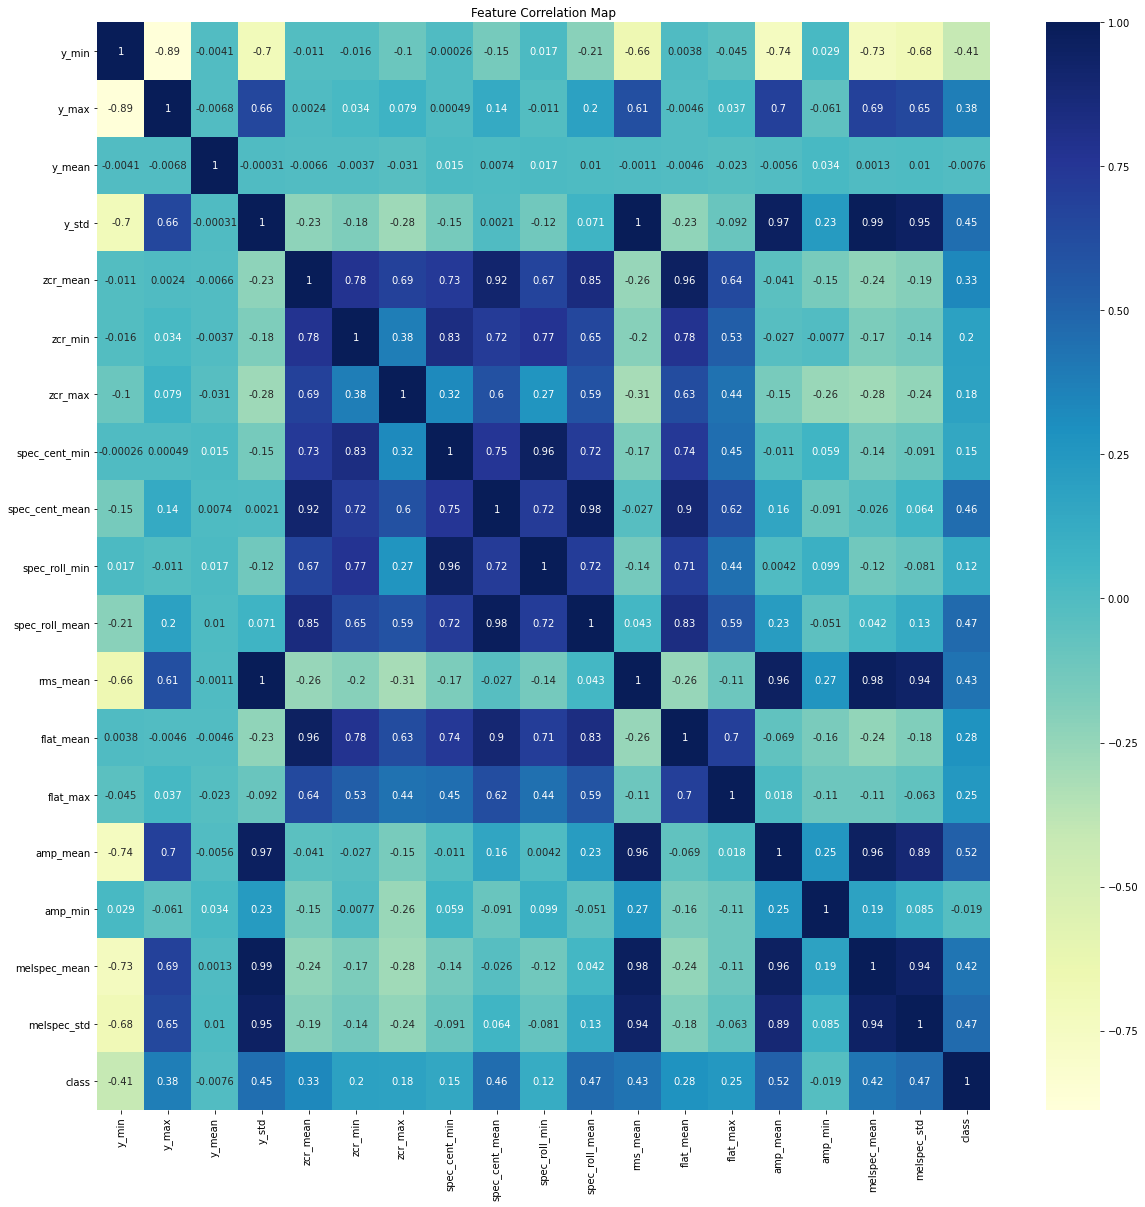

In [4]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(),cmap="YlGnBu", annot=True)
plt.title("Feature Correlation Map")

plt.savefig('../img/heatmap.pdf')

In [126]:
df_1.columns

Index(['y_min', 'y_max', 'y_mean', 'y_std', 'zcr_mean', 'zcr_min', 'zcr_max',
       'spec_cent_min', 'spec_cent_mean', 'spec_roll_min', 'spec_roll_mean',
       'rms_mean', 'flat_mean', 'flat_max', 'amp_mean', 'amp_min',
       'melspec_mean', 'melspec_std', 'class'],
      dtype='object')

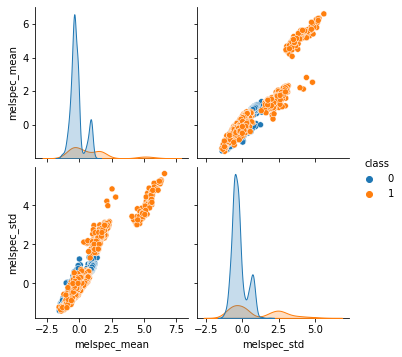

In [34]:

sns.pairplot(df_1.loc[:,[
       'melspec_mean', 'melspec_std', 'class']],hue='class')
plt.savefig('../img/pairplot_melspec_mean_std.pdf')

In [36]:
X = df_1.loc[:,['melspec_mean', 'melspec_std']]


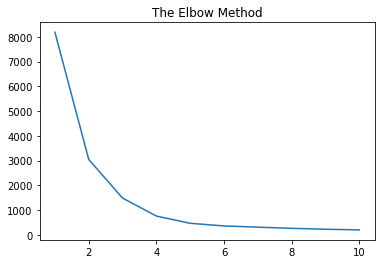

In [37]:
wcss=[]
for i in range(1,11):
    kMeans = KMeans(n_clusters= i, init= 'k-means++',max_iter=300,n_init=10,random_state=0)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)
plt.plot(range(1,11),wcss)

plt.title('The Elbow Method')
plt.savefig('../img/elbow_method.pdf')


In [1]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
fig = plt.figure()
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100,c='red',label='uncertain')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100,c='blue',label='uncertain')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100,c='green',label='Abnormal')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')


fig.suptitle('clusters', fontsize=20)
plt.xlabel('y_min', fontsize=18)
plt.ylabel('y_max', fontsize=16)
plt.legend()
plt.savefig('../img/normal_abnormal_clusters_slider.pdf')    

NameError: name 'KMeans' is not defined

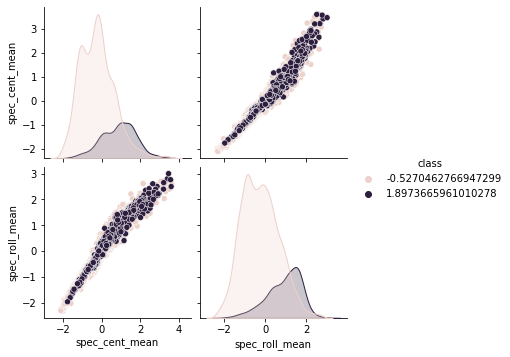

In [10]:

sns.pairplot(df_1.loc[:,['spec_cent_mean','spec_roll_mean','class']],hue='class')
plt.savefig('../img/pairplot_spec_cent_roll_mean_slider.pdf')

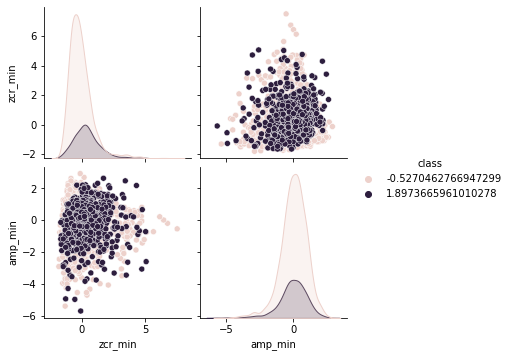

In [15]:

sns.pairplot(df_1.loc[:,['zcr_min','amp_min','class']],hue='class')
plt.savefig('../img/pairplot_zcr_amp_mean.png')

In [16]:
df_1_

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,0.330403,-0.111409,-0.612230,-0.547201,-0.780598,-0.634709,-1.047566,-0.005438,-0.186318,0.477745,0.136254,-0.550328,-0.253502,-0.086932,-0.791563,-0.798138,-0.443195,-0.309697,-0.527046
1,0.705956,-0.150267,-2.034142,-0.515184,-0.993941,-0.711149,-0.811749,-1.166987,-1.233736,-1.431716,-1.290532,-0.492211,-0.934917,-0.942717,-0.574466,-0.391122,-0.424643,-0.534390,-0.527046
2,0.489557,-0.290336,0.455827,-0.073744,-0.878037,-0.672929,-1.098553,-0.380285,-0.961878,-0.088021,-0.901947,-0.014322,-0.809844,-0.688188,-0.144908,0.006556,-0.074864,-0.345452,-0.527046
3,0.869332,-0.957783,-0.013581,-0.290334,-0.494573,-0.672929,-0.932844,0.588445,-0.126237,0.813669,0.221742,-0.259287,-0.324310,0.353320,-0.423958,0.228802,-0.236818,-0.304734,-0.527046
4,0.797117,-0.853169,-0.170294,-0.109574,-1.052019,-0.825809,-1.187781,-0.927016,-1.361076,-0.759868,-1.437317,-0.059727,-0.991090,-0.455432,-0.221353,0.517874,-0.107544,-0.335033,-0.527046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,-1.646317,1.963358,-0.831703,-0.055760,-0.403302,-0.176070,0.807103,-0.355850,-0.429871,-0.600747,-0.442208,-0.185129,-0.382877,-0.821247,-0.019637,-0.362810,-0.093600,0.235024,1.897367
4090,-2.158681,2.316368,-0.670230,-0.293480,0.368368,0.702990,0.698755,0.200895,0.209927,-0.441625,0.100268,-0.503777,0.229469,0.738127,-0.216879,-0.756139,-0.325548,0.115031,1.897367
4091,-1.601332,2.131823,-0.830824,-0.552866,0.400806,0.932310,0.756116,0.437705,0.257964,-0.476985,0.220442,-0.756858,0.202141,-0.336263,-0.532846,-1.588571,-0.505483,-0.000577,1.897367
4092,-0.778805,0.995287,-0.634274,-0.897181,2.709773,0.244350,1.023800,0.140987,2.065875,-0.070341,1.730146,-1.247587,4.062741,1.807543,-0.711404,-3.822867,-0.892747,-0.209592,1.897367
